In [ ]:
#1. Background
#K-Nearest Neighbours is one of the most basic yet essential classification algorithms in Machine Learning.
#It belongs to the supervised learning domain and finds intense application in pattern recognition, data mining, and intrusion detection.
#It follows a non-parametric approach i.e. it does not make any underlying assumptions about the distribution of data.
#It is also referred to as Lazy Learning because they delay processing until a new instance is classified.

#It is called instance-based learning because it memorizes or learns from the dataset.
#The number of parameters is unbounded and grows with the size of the data and classifies new instances based on 
#direct comparison.

#For classification, the output can be calculated as the class with the highest frequency from the K-most similar instances.
#Each instance in essence votes for their class and the class with the most votes is taken as the prediction.
#Class probabilities can be calculated as the normalized frequency of samples of each class in the set of K-most similar instances.
#using K and having an even number of classes (e.g. 2) it is a good idea to choose a K value with an odd number to avoid a tie.
#And the inverse, use an even number for K when you have an odd number of classes.

In [ ]:
#2. Problem Statement

#The study of the classification of types of glass was motivated by criminological investigation.
#It is an important task in forensic science to analyze the type of glasses found at the crime scenes
#This information can be used because glass fragments can stick to the shoes or garments of a burglar and can be used to trace them.
#A record of glass type and their chemical composition is made and stored for future use.
#The main ingredient of glass:  𝑆𝑖𝑂2 , other contents are also oxides, such as  𝑁𝑎2𝑂 ,  𝐶𝑎𝑂 ,  𝐾2𝑂 .

#A house break-in victim informed the police that the intruder had entered by shattering their window.
#There are several types of glass fragments found at the crime scene and 5 suspects have been found for investigation.
#You are tasked with designing a classifier that is trained on the previous records of various types of glasses.
#This classifier will then be used to determine the types of glasses found at the given crime scene.
#It will also be used to check the glass types found in the suspects' garments and shoes.
#The dataset has been categorized by categories of glasses and the composition of various minerals present in their oxides.
#The Refractive Index of each glass is also mentioned which will help the cops to identify the actual intruders.

In [ ]:
# 3 Installing Libraries

In [216]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
import plotly.graph_objects as go                                   # Importing to make interactive plots                    
from plotly.subplots import make_subplots                           # Importing to create subplots in plotly
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler                    # Importing to scale the features
from sklearn.model_selection import train_test_split                # Importing to split the data into train and test data
from sklearn.neighbors import KNeighborsClassifier                  # To instantiate a KNN Classifier
from sklearn.linear_model import LogisticRegression                 # To instantiate a Logistic Regression Classifier
from sklearn.ensemble import RandomForestClassifier                 # To instantiate a Random Forest Classifier
from sklearn.naive_bayes import GaussianNB                          # To instantiate a Naive Bayes Classifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
from sklearn.metrics import plot_confusion_matrix
# To calculate the accuracy of classifiers
from sklearn.model_selection import KFold                           # To create k folds for cross validation
from sklearn.model_selection import cross_validate                  # To calculate cross validation scores
from sklearn.model_selection import GridSearchCV                    # To tune the models
#-------------------------------------------------------------------------------------------------------------------------------
import time                                                         # Importing to calculate time
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

import plotly.graph_objects as go

In [ ]:
#4. Data acquisition and description

#Data set has 9 key properties where the first one is the optical property and the rest 8 are the chemical oxide contents of glass.
#So, the property 1 and property 2-9 have different dimensions.

#Data has 214 records and 10 columns


#id	Feature Name	Description
#01	RI	Refractive index.
#02	Na	Sodium (weight percent in corresponding oxide).
#03	Mg	Magnesium (weight percent in corresponding oxide).
#04	Al	Aluminum (weight percent in corresponding oxide).
#05	Si	Silicon (weight percent in corresponding oxide).
#06	K	Potassium (weight percent in corresponding oxide).
#07	Ca	Calcium (weight percent in corresponding oxide).
#08	Ba	Barium (weight percent in corresponding oxide).
#09	Fe	Iron (weight percent in corresponding oxide).
#10	Type	Type of glass (class attribute)


In [139]:
glass = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-3/master/Data/CaseStudy/glass.csv")



glass.head()

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

In [140]:
glass.shape

(214, 10)

In [141]:
glass.describe()

#The Type feature has distinct values ranging from 1 to 7.
#The majority values of Type feature are either 1 or 2.
#More than 25% of cells corresponding to the Type feature have value of 1.
#Less than 25% values of Type feature range from 4 to 7.
#More than 75% of cells have zeros present in Ba feature.
#Similarly, more than 50% of cells corresponding to Fe feature have zeros.

RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1.000000  
25%      8.240000    0.000000    0.000000    1.000000  
50%      8.600000    0.000000    0.000000    2.000000  
75%      9.172500    0.000000    0.100000    3.000000  
max     16.190000    3.150000    0.510000    7.000000

In [142]:
glass.info()

#All variables are float except Type of glass which is integer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
#5. Data Preprocessing

In [143]:
# checking for missing values

glass.isnull().sum().sort_values(ascending=False)


#There are no misisng values in the dataset


RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [144]:
# checking for duplicates

glass.duplicated().sum()


1

In [145]:
#dropping duplicates

glass.drop_duplicates(inplace=True)

glass.shape

(213, 10)

In [146]:
#checking for skewness in all the variables

#in variable Type

glass.Type.value_counts(normalize=True)*100

#Data is not normally distributed

2    35.680751
1    32.394366
7    13.615023
3     7.981221
5     6.103286
6     4.225352
Name: Type, dtype: float64

In [147]:
#checking skewness in independent variables

cols = glass.select_dtypes(include='float').columns.to_list()
cols

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

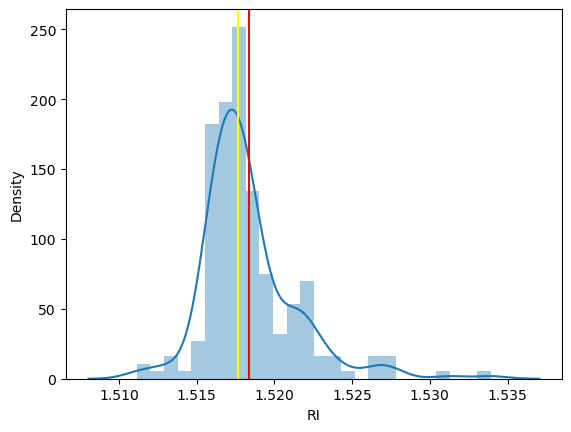

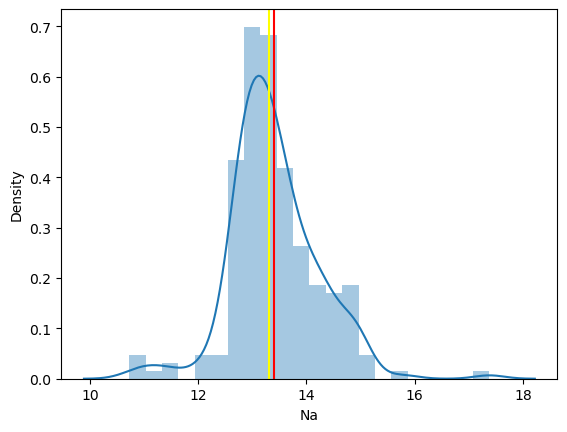

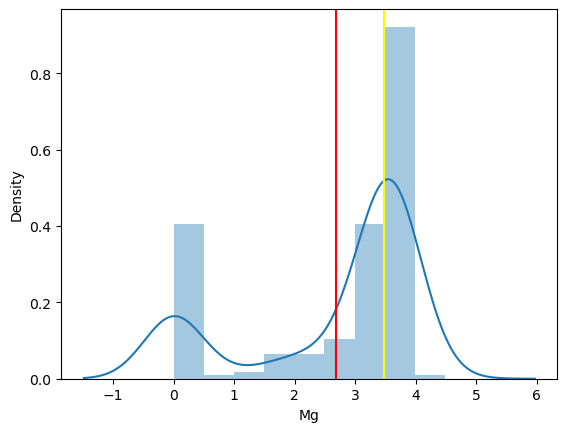

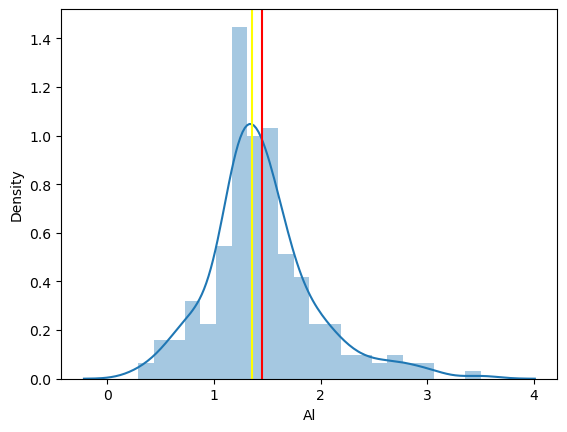

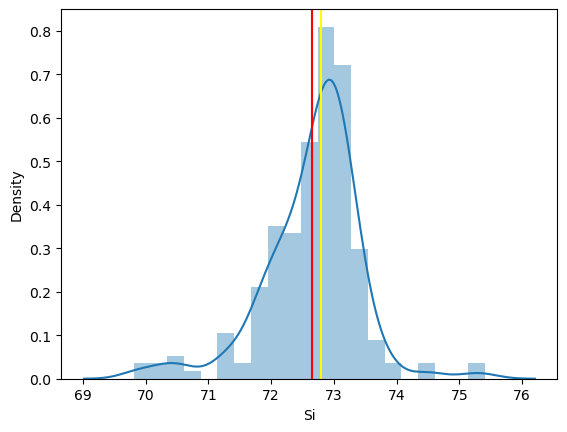

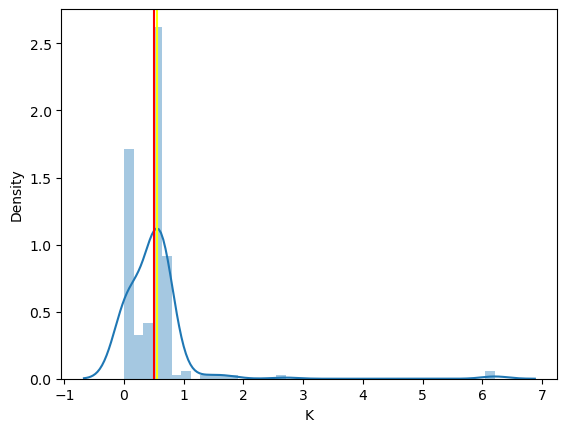

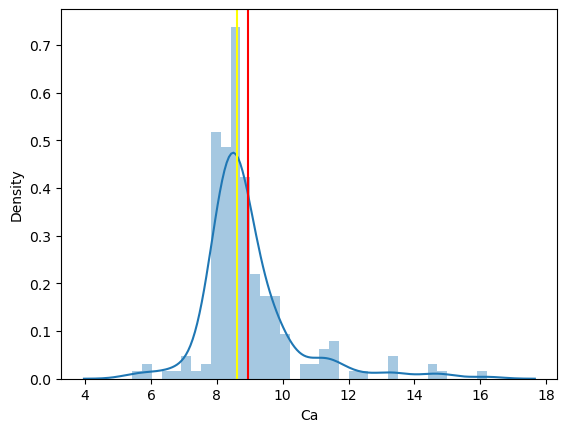

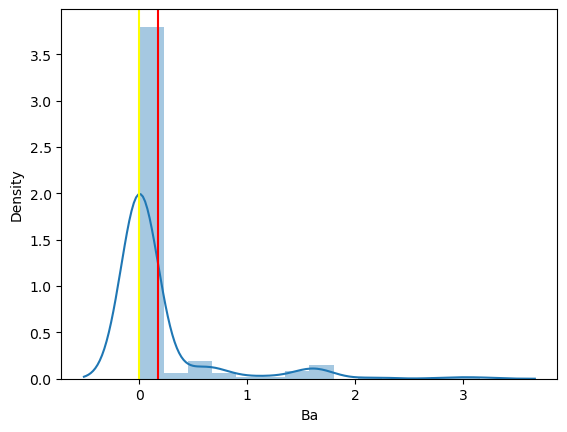

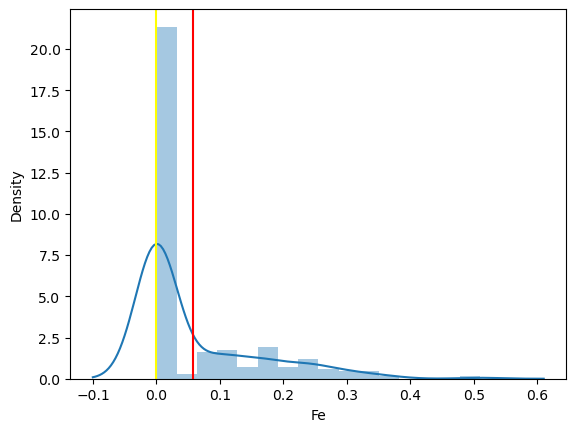

In [148]:
for c in cols:
    sns.distplot(glass[c])
    plt.axvline(glass[c].mean(), color='red')
    plt.axvline(glass[c].median(), color='yellow')
    print("="*60)
    plt.show()
    
# 

In [149]:
for c in cols:
    print("Skewness in ", c, "is:", glass[c].skew())
    print("="*40)
    
#A skewness value greater than 1 or less than -1 indicates a highly skewed distribution. 
#A value between 0.5 and 1 or -0.5 and -1 is moderately skewed. A value between -0.5 and 0.5 indicates 
#that the distribution is fairly symmetrical.

#Other than Na for all the indedendent variables the data is skewed.

Skewness in  RI is: 1.6480173737729908
Skewness in  Na is: 0.46569850922621137
Skewness in  Mg is: -1.1460958436967303
Skewness in  Al is: 0.9384017147473468
Skewness in  Si is: -0.7446460155618705
Skewness in  K is: 6.545428649493799
Skewness in  Ca is: 2.050752066632569
Skewness in  Ba is: 3.406748836984873
Skewness in  Fe is: 1.747173207250088


In [172]:
def check_skewness(v):
    if v>1 or v<-1:
        return "High Skewness"
    elif 0.5<v<1 or -1<v<-0.5:
        return "Moderately Skewed"
    elif -0.5<=v<=0.5:
        return "Fairly Symmetrical"    

In [173]:
for c in cols:
    skewness = check_skewness(glass[c].skew())
    print("Skewness in ", c, "is:", skewness)
    print("="*40)

Skewness in  RI is: High Skewness
Skewness in  Na is: Fairly Symmetrical
Skewness in  Mg is: High Skewness
Skewness in  Al is: Moderately Skewed
Skewness in  Si is: Moderately Skewed
Skewness in  K is: High Skewness
Skewness in  Ca is: High Skewness
Skewness in  Ba is: High Skewness
Skewness in  Fe is: High Skewness


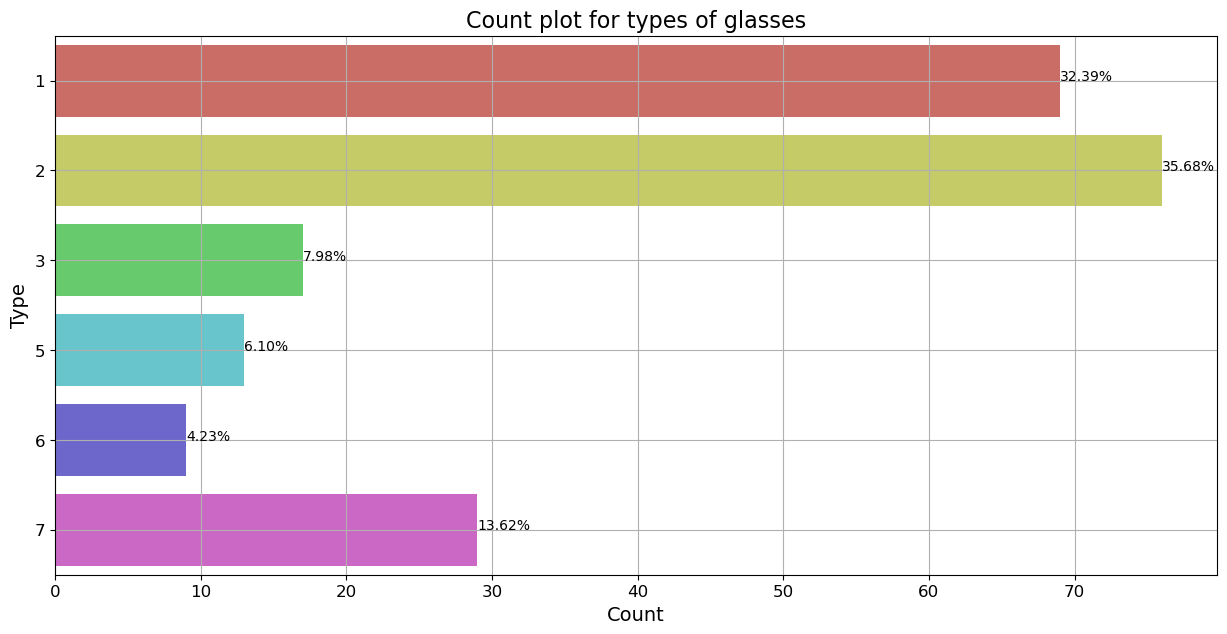

In [174]:
#6. Exploratory Data Analysis

#Frequency distribution of each glass type

# Create a figure of 15 x 7 inches
fig = plt.figure(figsize=(15, 7))

# Create a countplot for Type feature
ax = sns.countplot(y='Type', data=glass, palette='hls')

# Adding percentages to the bars
total = glass.shape[0]
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_width() / total)
    x = p.get_x() + p.get_width()
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y))

# Adding some cosmetics
plt.yticks(size=12)
plt.xticks(size=12)
plt.xlabel(xlabel="Count", size=14)
plt.ylabel(ylabel='Type', size=14)
plt.title(label="Count plot for types of glasses", size=16)
plt.grid(b=True)

# Display the output
plt.show()

#The frequency distribution of glass 2 is highest followed by glass 1.
#No glass of type 4 in dataset.

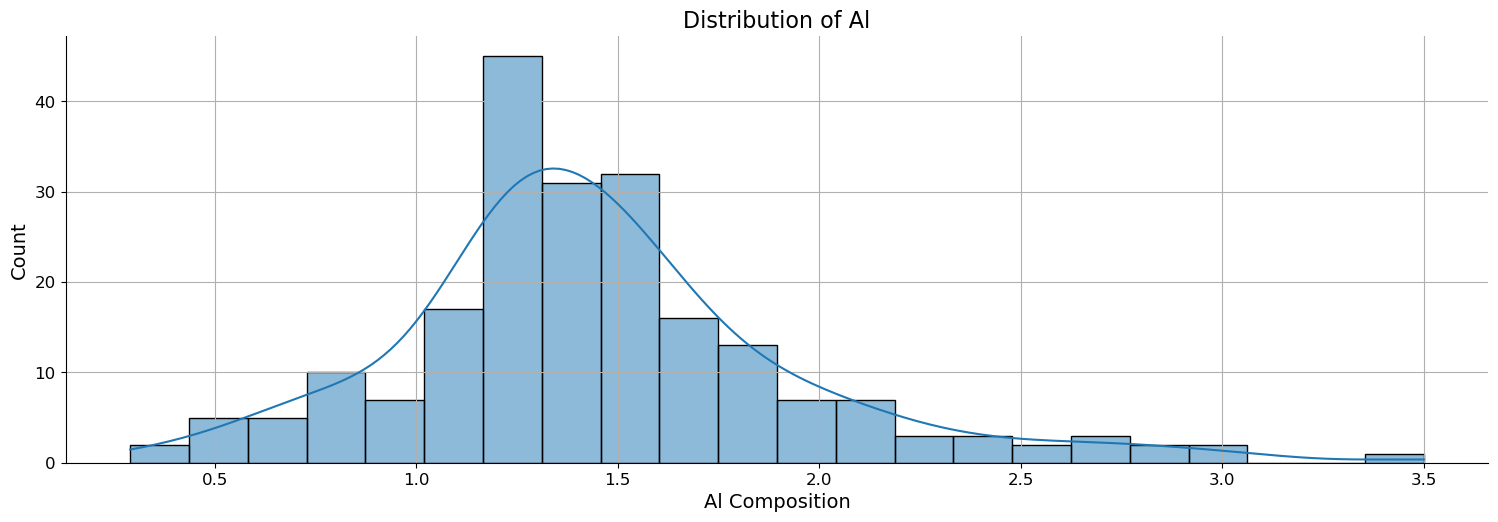

In [175]:
#Frequency distribution of Al feature

# Create a countplot for Type feature
sns.displot(x='Al', data=glass, kde=True, height=5, aspect=3)

# Adding some cosmetics
plt.yticks(size=12)
plt.xticks(size=12)
plt.xlabel(xlabel="Al Composition", size=14)
plt.ylabel(ylabel='Count', size=14)
plt.title(label="Distribution of Al", size=16)
plt.grid(b=True)

# Display the output
plt.show()

#highly skewed towards right due to extreme values present b/w 3-3.5

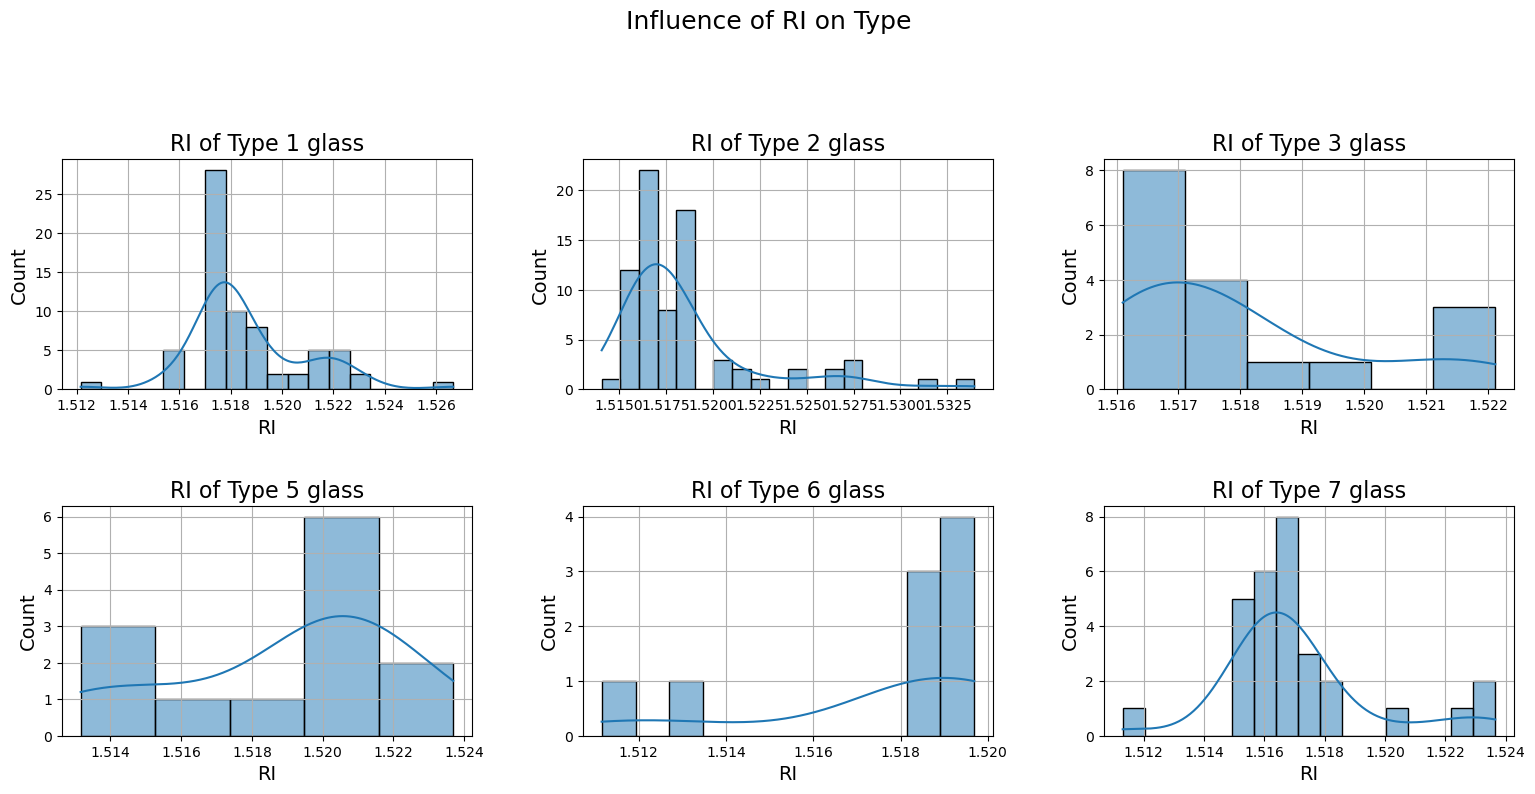

In [176]:
#Using RI to see it relation with the type of glass

# Instantiate a figure of size of 20 x 25 inches with 6 subplots
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))

# Create KDE plots
sns.histplot(x='RI', data=glass[glass['Type']==1], ax=ax[0, 0], kde=True)
sns.histplot(x='RI', data=glass[glass['Type']==2], ax=ax[0, 1], kde=True)
sns.histplot(x='RI', data=glass[glass['Type']==3], ax=ax[0, 2], kde=True)
sns.histplot(x='RI', data=glass[glass['Type']==5], ax=ax[1, 0], kde=True)
sns.histplot(x='RI', data=glass[glass['Type']==6], ax=ax[1, 1], kde=True)
sns.histplot(x='RI', data=glass[glass['Type']==7], ax=ax[1, 2], kde=True)

# Adding some cosmetics - ticks, labels, title, legend and grid.
ax[0, 0].set_title(label='RI of Type 1 glass', fontsize=16)
ax[0, 1].set_title(label='RI of Type 2 glass', fontsize=16)
ax[0, 2].set_title(label='RI of Type 3 glass', fontsize=16)
ax[1, 0].set_title(label='RI of Type 5 glass', fontsize=16)
ax[1, 1].set_title(label='RI of Type 6 glass', fontsize=16)
ax[1, 2].set_title(label='RI of Type 7 glass', fontsize=16)

# We have to flatten axes (from (2,3) to (1,6) to apply cosmetics
ax = ax.flatten()
for axes in ax:
  axes.set_ylabel(ylabel='Count', size=14)
  axes.set_xlabel(xlabel='RI', size=14)
  axes.grid(b=True)

# Setting a super title for the plots
plt.suptitle(t='Influence of RI on Type', size=18, y=1.02)
plt.tight_layout(pad=3)

# Display the figures
plt.show()

# The RI has limited range in Type 3, 5,6,7 due to limited dataset
# Glass type 2 has highest RI value while type 6 has the lowest

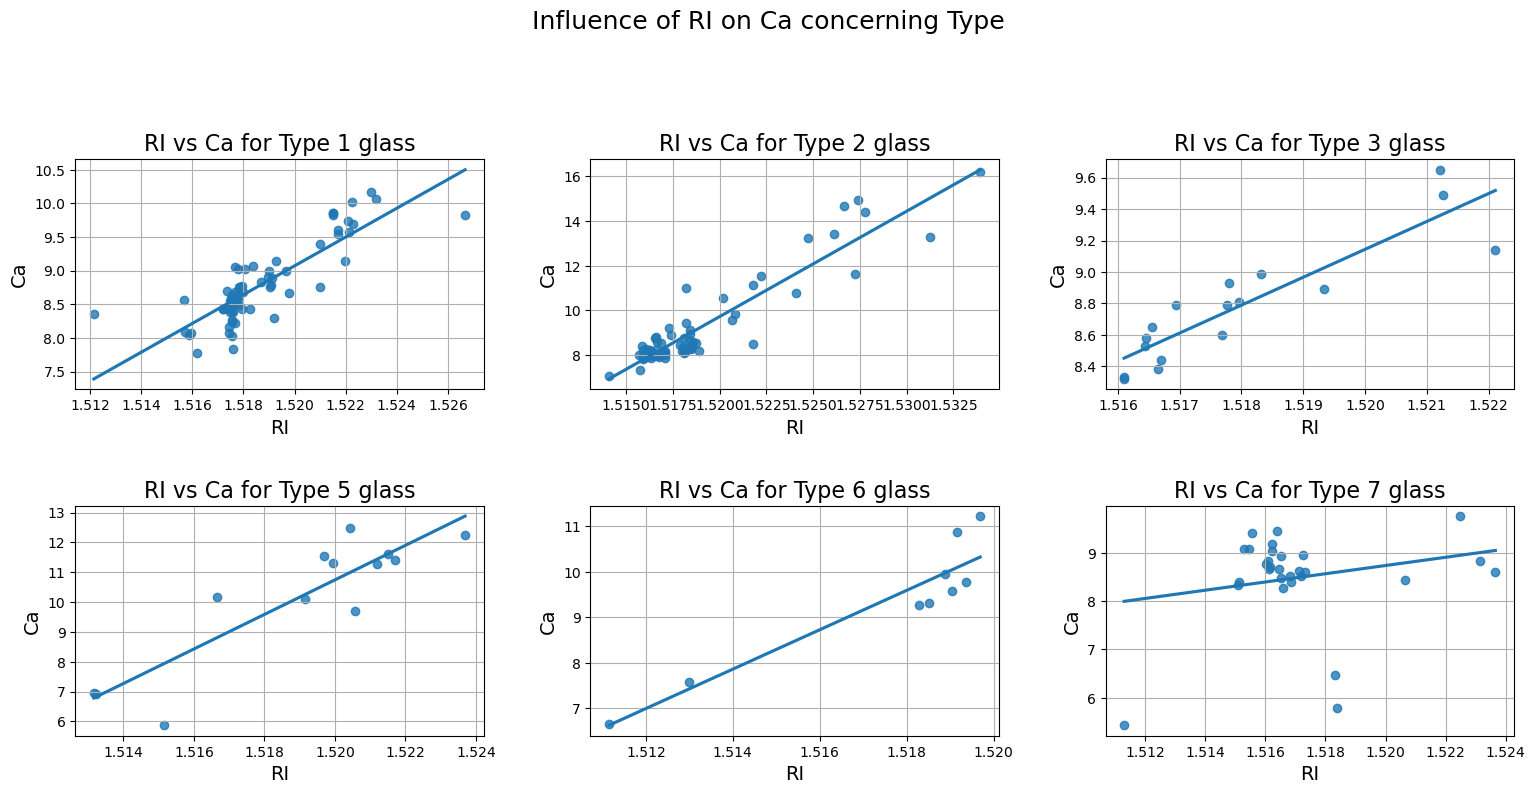

In [177]:
#Assessing relation between RI and Calcium among the type of glasses

# Instantiate a figure of size of 16 x 8 inches with 6 subplots
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))

#Create plots
sns.regplot(x='RI', y='Ca', data=glass[glass['Type']==1], ax=ax[0, 0], ci=None)
sns.regplot(x='RI', y='Ca', data=glass[glass['Type']==2], ax=ax[0, 1], ci=None)
sns.regplot(x='RI', y='Ca', data=glass[glass['Type']==3], ax=ax[0, 2], ci=None)
sns.regplot(x='RI', y='Ca', data=glass[glass['Type']==5], ax=ax[1, 0], ci=None)
sns.regplot(x='RI', y='Ca', data=glass[glass['Type']==6], ax=ax[1, 1], ci=None)
sns.regplot(x='RI', y='Ca', data=glass[glass['Type']==7], ax=ax[1, 2], ci=None)

# Adding some cosmetics - ticks, labels, title, legend and grid.
ax[0, 0].set_title(label='RI vs Ca for Type 1 glass', fontsize=16)
ax[0, 1].set_title(label='RI vs Ca for Type 2 glass', fontsize=16)
ax[0, 2].set_title(label='RI vs Ca for Type 3 glass', fontsize=16)
ax[1, 0].set_title(label='RI vs Ca for Type 5 glass', fontsize=16)
ax[1, 1].set_title(label='RI vs Ca for Type 6 glass', fontsize=16)
ax[1, 2].set_title(label='RI vs Ca for Type 7 glass', fontsize=16)

# We have to flatten the axes (from (2,3) to (1,6) to apply cosmetics
ax = ax.flatten()
for axes in ax:
  axes.set_ylabel(ylabel='Ca', size=14)
  axes.set_xlabel(xlabel='RI', size=14)
  axes.grid(b=True)

# Setting a super title for the plots
plt.suptitle(t='Influence of RI on Ca concerning Type', size=18, y=1.02)
plt.tight_layout(pad=3)

# Display the figures
plt.show()

#We see high correlation between RI and Ca among all the data types

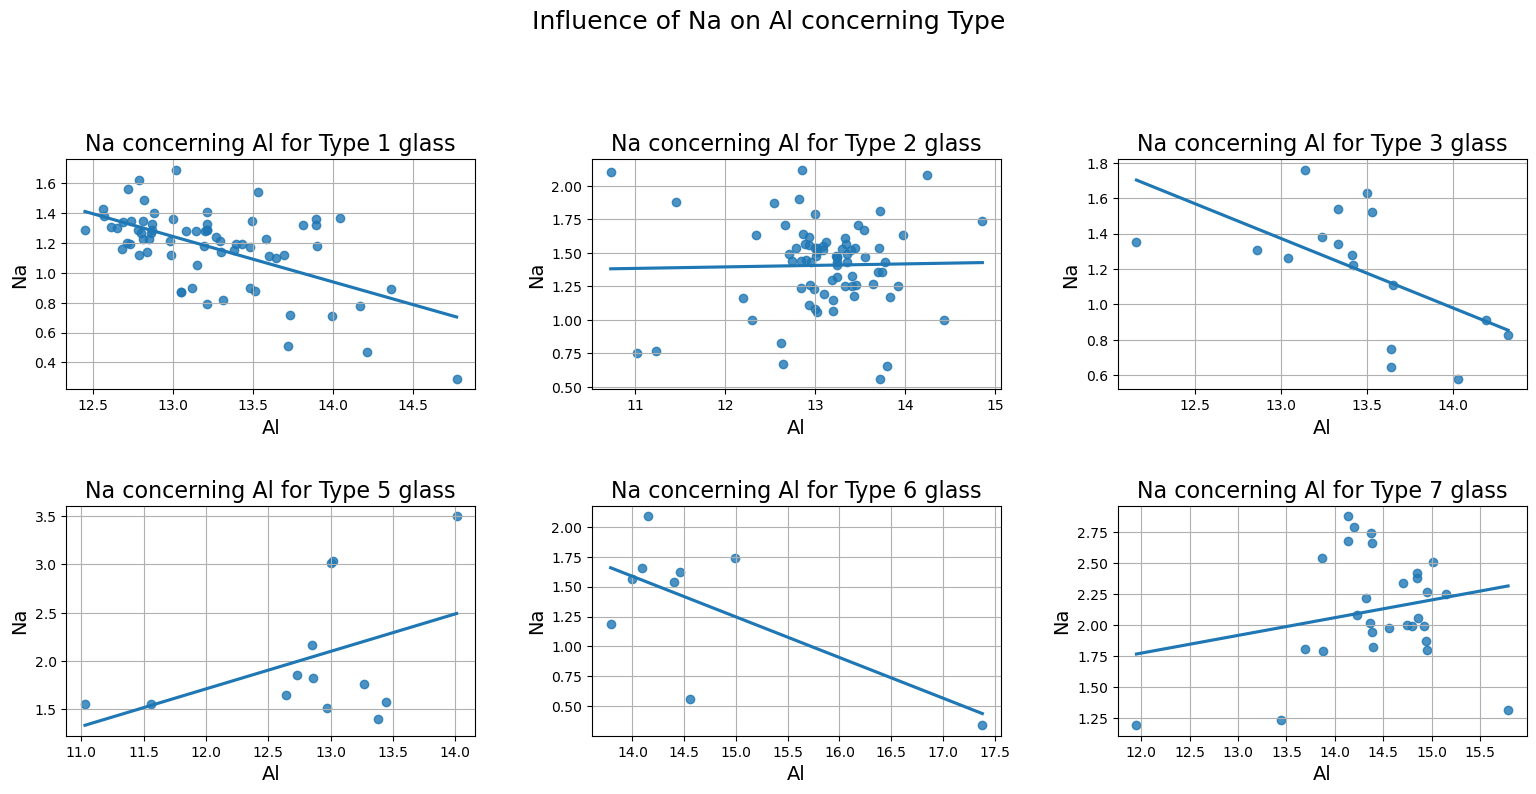

In [178]:
#Relation among Na and Al w.r.t. Type of glass

# Instantiate a figure of size of 16 x 8 inches with 6 subplots
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))

# Create plots
sns.regplot(x='Na', y='Al', data=glass[glass['Type']==1], ax=ax[0, 0], ci=None)
sns.regplot(x='Na', y='Al', data=glass[glass['Type']==2], ax=ax[0, 1], ci=None)
sns.regplot(x='Na', y='Al', data=glass[glass['Type']==3], ax=ax[0, 2], ci=None)
sns.regplot(x='Na', y='Al', data=glass[glass['Type']==5], ax=ax[1, 0], ci=None)
sns.regplot(x='Na', y='Al', data=glass[glass['Type']==6], ax=ax[1, 1], ci=None)
sns.regplot(x='Na', y='Al', data=glass[glass['Type']==7], ax=ax[1, 2], ci=None)

# Adding some cosmetics - labels, title and grid.
ax[0, 0].set_title(label='Na concerning Al for Type 1 glass', fontsize=16)
ax[0, 1].set_title(label='Na concerning Al for Type 2 glass', fontsize=16)
ax[0, 2].set_title(label='Na concerning Al for Type 3 glass', fontsize=16)
ax[1, 0].set_title(label='Na concerning Al for Type 5 glass', fontsize=16)
ax[1, 1].set_title(label='Na concerning Al for Type 6 glass', fontsize=16)
ax[1, 2].set_title(label='Na concerning Al for Type 7 glass', fontsize=16)

# We have to flatten axes (from (2,3) to (1,6) to apply cosmetics
ax = ax.flatten()
for axes in ax:
  axes.set_ylabel(ylabel='Na', size=14)
  axes.set_xlabel(xlabel='Al', size=14)
  axes.grid(b=True)

# Setting a super title for the plots
plt.suptitle(t='Influence of Na on Al concerning Type', size=18, y=1.02)
plt.tight_layout(pad=3)

# Display the figures
plt.show()

# For glass type=1,, 3,6 we observe a negative correlation whereas for glass type=2, we observe no relationship
#between Al and Na.Positive relation with type 5 and 6

# We can infer that for type 1,6,3 glass, if Na is found in higher composition, Al should be found in slightly \
#lower composition.

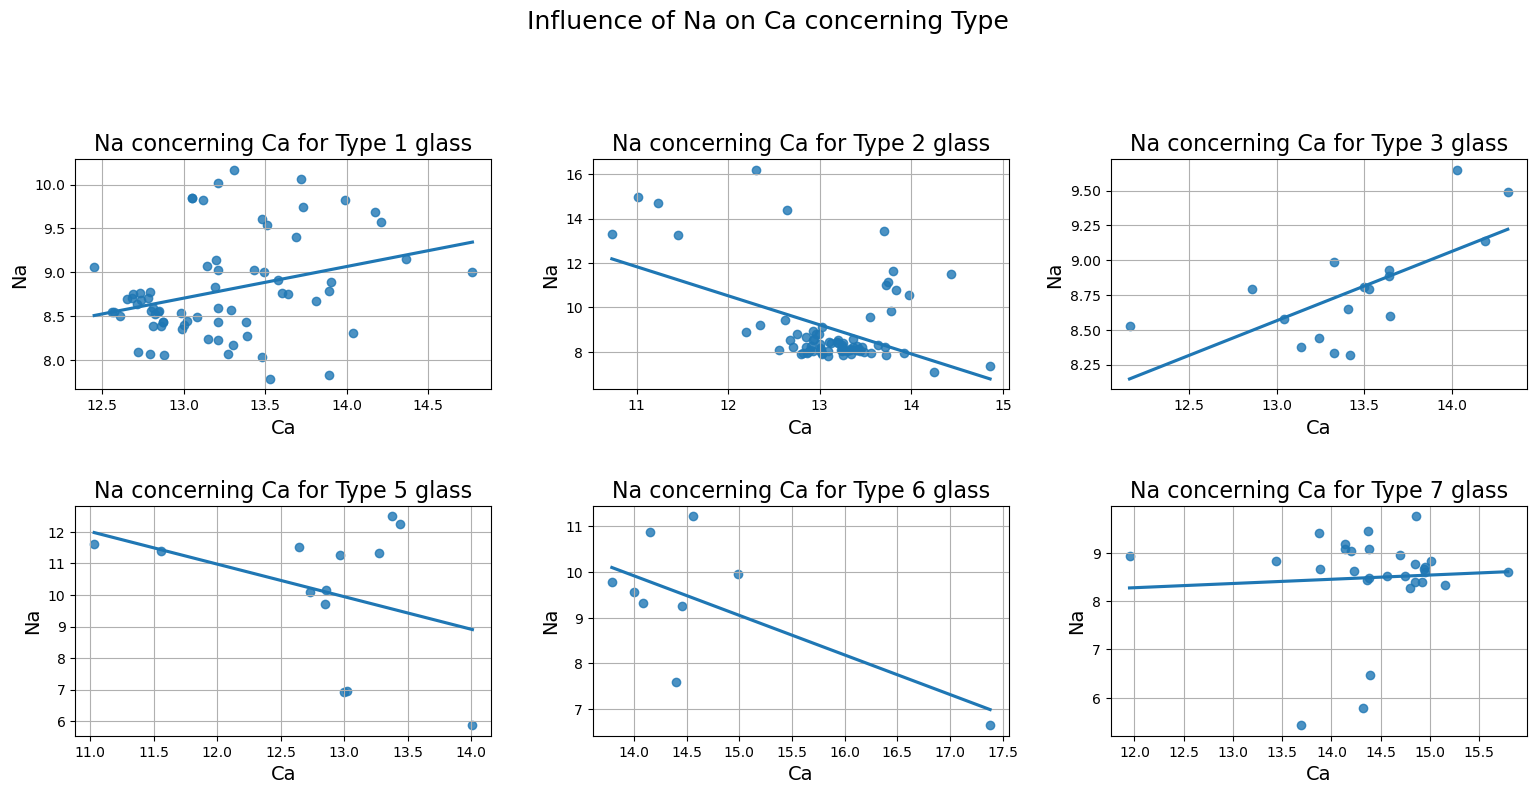

In [179]:
#Finding relation between NA, Ca among type of glass

# Instantiate a figure of size of 16 x 8 inches with 6 subplots
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))

# Create plots
sns.regplot(x='Na', y='Ca', data=glass[glass['Type']==1], ax=ax[0, 0], ci=None)
sns.regplot(x='Na', y='Ca', data=glass[glass['Type']==2], ax=ax[0, 1], ci=None)
sns.regplot(x='Na', y='Ca', data=glass[glass['Type']==3], ax=ax[0, 2], ci=None)
sns.regplot(x='Na', y='Ca', data=glass[glass['Type']==5], ax=ax[1, 0], ci=None)
sns.regplot(x='Na', y='Ca', data=glass[glass['Type']==6], ax=ax[1, 1], ci=None)
sns.regplot(x='Na', y='Ca', data=glass[glass['Type']==7], ax=ax[1, 2], ci=None)

# Adding some cosmetics - labels, title and grid.
ax[0, 0].set_title(label='Na concerning Ca for Type 1 glass', fontsize=16)
ax[0, 1].set_title(label='Na concerning Ca for Type 2 glass', fontsize=16)
ax[0, 2].set_title(label='Na concerning Ca for Type 3 glass', fontsize=16)
ax[1, 0].set_title(label='Na concerning Ca for Type 5 glass', fontsize=16)
ax[1, 1].set_title(label='Na concerning Ca for Type 6 glass', fontsize=16)
ax[1, 2].set_title(label='Na concerning Ca for Type 7 glass', fontsize=16)

# We have to flatten axes (from (2,3) to (1,6) to apply cosmetics
ax = ax.flatten()
for axes in ax:
  axes.set_ylabel(ylabel='Na', size=14)
  axes.set_xlabel(xlabel='Ca', size=14)
  axes.grid(b=True)

# Setting a super title for the plots
plt.suptitle(t='Influence of Na on Ca concerning Type', size=18, y=1.02)
plt.tight_layout(pad=3)

# Display the figures
plt.show()

#We can see that there some negative relation between the features concerning the glass type 2, 5 and 6.
#There seems to be some positive correlation among the two features for glass types 1 and 3.
#There is no relation between the two features for type 7.

In [191]:
#7. Data POST PROCESSING

#7.1 Dividing the data into dependent and independent variables

X = glass.loc[:,glass.columns != 'Type']
y = glass.Type

In [192]:
X.head(2)

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0

In [182]:
X.describe()

RI          Na          Mg          Al          Si           K  \
count  213.000000  213.000000  213.000000  213.000000  213.000000  213.000000   
mean     1.518348   13.404085    2.679202    1.449484   72.655070    0.498873   
std      0.003033    0.816662    1.443691    0.495925    0.773998    0.653185   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516520   12.900000    2.090000    1.190000   72.280000    0.130000   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.560000   
75%      1.519150   13.810000    3.600000    1.630000   73.090000    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe  
count  213.000000  213.000000  213.000000  
mean     8.954085    0.175869    0.057277  
std      1.425882    0.498245    0.097589  
min      5.430000    0.000000    0.000000  
25%      8.240000    0.000000    0.000000  
50%      8.600000    0.000000    0.000000  
75%      9.150000    0.000000    0.100000  
max     16.190000    3.150000    0.510000

In [193]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: int64

In [194]:
#7.3 Splitting data into test and train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Print the shape of the train and test sets
print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (149, 9) (149,)
Testing Data Shape: (64, 9) (64,)


In [195]:
cols = glass.columns.to_list()[0:-1]
cols

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

In [196]:
#7.3 Scaling the dataset

ss = StandardScaler()
X_train[cols] = ss.fit_transform(X_train[cols])
X_test[cols] = ss.transform(X_test[cols])


In [197]:
# 7.4 Checking for skewness

for c in cols:
    skewness = check_skewness(X_train[c].skew())
    print("Skewness in",c,"is:",skewness)
    print("="*40)

Skewness in RI is: High Skewness
Skewness in Na is: Moderately Skewed
Skewness in Mg is: High Skewness
Skewness in Al is: Moderately Skewed
Skewness in Si is: Moderately Skewed
Skewness in K is: Fairly Symmetrical
Skewness in Ca is: High Skewness
Skewness in Ba is: High Skewness
Skewness in Fe is: High Skewness


In [198]:
#8. Model Developement and Evaluation

#8.1 Base model with KNN
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [199]:
#checking accuracy score of test and train dataset

accuracy_score(y_train, classifier.predict(X_train))

0.738255033557047

In [200]:
accuracy_score(y_test, y_pred)

0.71875

In [ ]:
#The accuracy score of train dataset is more than test dataset and difference is less than 5%. So the model is 
#fitted well.

In [201]:
#Confusion matrix
confusion_matrix(y_test, y_pred)

array([[17,  1,  0,  0,  0,  0],
       [ 5, 17,  0,  2,  0,  0],
       [ 3,  1,  0,  0,  0,  0],
       [ 0,  2,  0,  2,  0,  0],
       [ 0,  1,  0,  0,  2,  0],
       [ 0,  3,  0,  0,  0,  8]])

In [202]:
print (classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.68      0.94      0.79        18
           2       0.68      0.71      0.69        24
           3       0.00      0.00      0.00         4
           5       0.50      0.50      0.50         4
           6       1.00      0.67      0.80         3
           7       1.00      0.73      0.84        11

    accuracy                           0.72        64
   macro avg       0.64      0.59      0.60        64
weighted avg       0.70      0.72      0.70        64



In [203]:
print (classification_report(y_train, classifier.predict(X_train)))

#Difference between the accuracy score of Train and test dataset is less than 5%
#Thus the model is fitted well

              precision    recall  f1-score   support

           1       0.64      0.88      0.74        51
           2       0.80      0.75      0.77        52
           3       0.00      0.00      0.00        13
           5       0.75      0.67      0.71         9
           6       1.00      0.67      0.80         6
           7       0.94      0.89      0.91        18

    accuracy                           0.74       149
   macro avg       0.69      0.64      0.66       149
weighted avg       0.70      0.74      0.71       149



In [205]:
#Calculating error

error = []

for k in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error.append(np.mean(y_pred != y_test))

In [206]:
len(error)

39

In [207]:
print(error)

[0.3125, 0.296875, 0.3125, 0.3125, 0.28125, 0.28125, 0.296875, 0.34375, 0.375, 0.34375, 0.34375, 0.359375, 0.375, 0.421875, 0.390625, 0.421875, 0.40625, 0.390625, 0.390625, 0.390625, 0.421875, 0.390625, 0.390625, 0.375, 0.40625, 0.40625, 0.4375, 0.40625, 0.40625, 0.390625, 0.390625, 0.40625, 0.40625, 0.421875, 0.421875, 0.40625, 0.40625, 0.40625, 0.421875]


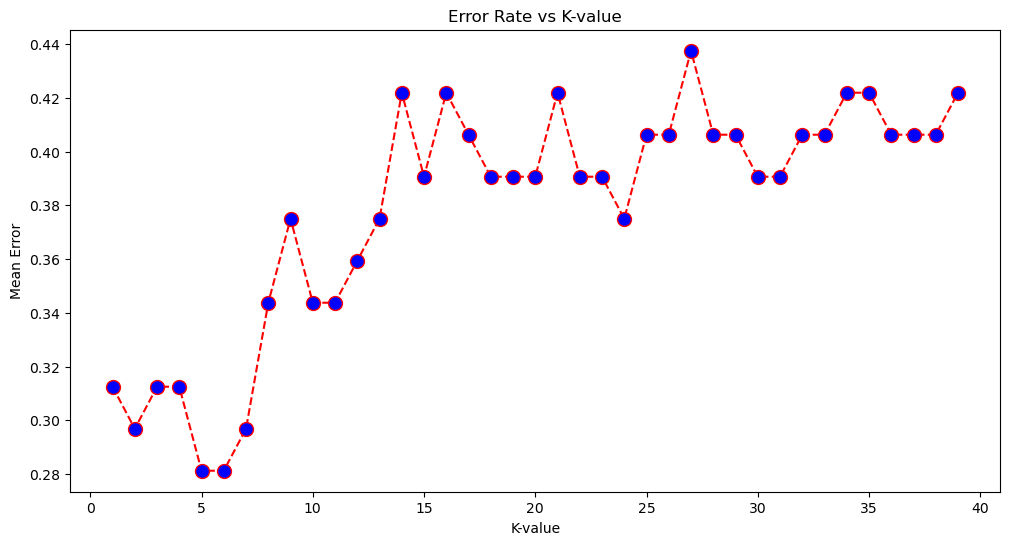

In [208]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40), error, color='red', linestyle='dashed', marker='o',
        markerfacecolor='blue', markersize=10)
plt.title("Error Rate vs K-value")
plt.xlabel('K-value')
plt.ylabel("Mean Error")
plt.show()

#So the least error is at K=5, which we have corectly used

In [ ]:
#8.2  Model Development & Evaluation with various classifiers without tuning

clfs = [KNeighborsClassifier(),
        RandomForestClassifier(random_state=0, class_weight='balanced'),
        GaussianNB(),
        LogisticRegression(random_state=0)]

In [209]:
for clf in clfs:
  # Extracting model name
  model_name = type(clf).__name__

  # Fit the model on train data
  clf.fit(X_train, y_train)

  # Make predictions using test data
  y_pred_train = clf.predict(X_train)

  # Make predictions using test data
  y_pred_test = clf.predict(X_test)

  # Calculate the train accuracy of the model
  clf_train_accuracy = accuracy_score(y_train, y_pred_train)

  # Calculate the test accuracy of the model
  clf_test_accuracy = accuracy_score(y_test, y_pred_test)

  # Display the accuracy of the model
  print('Performance Metric of', model_name, ':')
  print('[Train Accuracy]:', clf_train_accuracy)
  print('[Test Accuracy]:', clf_test_accuracy)
  print('----------------------------------------\n')

#KNN model does well comapred to other models w.r.t difference in the train and test accuracy score
#Performance in other models can be not upto the mark due to small sample size of the data

Performance Metric of KNeighborsClassifier :
[Train Accuracy]: 0.738255033557047
[Test Accuracy]: 0.71875
----------------------------------------

Performance Metric of RandomForestClassifier :
[Train Accuracy]: 1.0
[Test Accuracy]: 0.734375
----------------------------------------

Performance Metric of GaussianNB :
[Train Accuracy]: 0.5838926174496645
[Test Accuracy]: 0.53125
----------------------------------------

Performance Metric of LogisticRegression :
[Train Accuracy]: 0.7181208053691275
[Test Accuracy]: 0.703125
----------------------------------------



In [211]:
#8.3 Hyperparameter Tuning
#Using parametres for random forest classifier and KNN

#For RFC

param_grid_rfc = {
    'n_estimators' : [50,100,500,100],
    'max_features' : ['auto', 'sqrt', 'log2'],
    'max_depth' : [3,4,5,6,7,8,9,10],
    'criterion' : ['entropy', 'gini']
}

In [223]:
#For KNN

param_grid_knn = {
    'n_neighbors' : list(range(2,40)),
    'metric' : ['minkowski'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p' : list(range(1,6)),
    'weights' : ['uniform','distance']
}

In [224]:
param_grid = [param_grid_rfc, param_grid_knn]

In [225]:
best_scores = []
best_models = []
best_params = []

clfs = [
    RandomForestClassifier(random_state=0, class_weight='balanced'),
    KNeighborsClassifier(n_jobs=-1)
]


In [226]:
i = 0

for clf in clfs:
    model_name = type(clf).__name__
    gscv = GridSearchCV(estimator=clf, param_grid=param_grid[i], cv=5)
    start_time = time.time()
    gscv.fit(X_train, y_train)
    end_time = time.time()
    time_taken_for_evaluation = end_time-start_time
    best_scores.append(gscv.best_score_)
    best_params.append(gscv.best_params_)
    best_models.append(gscv.best_estimator_)
    print("Time taken for",model_name,"evaluation is:", np.round(time_taken_for_evaluation,2),'seconds')
    i += 1
    print("="*60)
    
#GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters 
#in a grid. It's essentially a cross-validation technique. The model as well as the parameters must be entered.

Time taken for RandomForestClassifier evaluation is: 79.28 seconds
Time taken for KNeighborsClassifier evaluation is: 24.69 seconds


In [227]:
#8.4 Model developement post tuning
best_params


[{'criterion': 'gini',
  'max_depth': 10,
  'max_features': 'auto',
  'n_estimators': 100},
 {'algorithm': 'auto',
  'metric': 'minkowski',
  'n_neighbors': 3,
  'p': 1,
  'weights': 'distance'}]

In [228]:
best_scores

[0.7719540229885057, 0.7183908045977011]

In [229]:
best_models

[RandomForestClassifier(class_weight='balanced', max_depth=10,
                        max_features='auto', random_state=0),
 KNeighborsClassifier(n_jobs=-1, n_neighbors=3, p=1, weights='distance')]

In [231]:
for clf in best_models:
    model_name= type(clf).__name__
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    
    print("Result of model", model_name, ":")
    print("Train accuracy:", acc_train)
    print("Test accuracy:", acc_test)
    print("-"*40)
    
#Both models are overfitting as difference in train and test accuracy score is more than 5%

Result of model RandomForestClassifier :
Train accuracy: 1.0
Test accuracy: 0.75
----------------------------------------
Result of model KNeighborsClassifier :
Train accuracy: 1.0
Test accuracy: 0.75
----------------------------------------


In [243]:
#8.5 Cross Validation

#In this section, we will perform K cross-validation to estimate the performance of our best models.

# Creating list of cv scores
cv_train_scores = []
cv_test_scores = []
cv_test_mean = []

for clf in best_models:

  # Extracting model name
  model_name = type(clf).__name__

  # Calculating scores using cross validation
  # Using KFold() with 5 folds
  scores = cross_validate(estimator=clf,
                          X=X_train,
                          y=y_train,
                          cv=KFold(n_splits=5), 
                          scoring='accuracy', 
                          return_train_score=True)

  # scores is a dictionary with keys like test_score, train_score, fit_time, etc
  # We will extract test_score and append it to our cv_scores list
  cv_train_scores.append(scores['train_score'])
  cv_test_scores.append(scores['test_score'])

  # Calculating the mean of scores for both the models
  cv_test_mean.append((scores['test_score'].mean()))

In [244]:
cv_train_scores

[array([1., 1., 1., 1., 1.]), array([1., 1., 1., 1., 1.])]

In [237]:
cv_test_scores  
    

[array([0.66666667, 0.8       , 0.8       , 0.8       , 0.79310345]),
 array([0.73333333, 0.73333333, 0.7       , 0.66666667, 0.75862069])]

In [245]:
cv_test_mean

[0.7445977011494253, 0.6839080459770115]

In [247]:
#We will create a plot for accuracy vs number of folds.

#Repeating the mean values 5 times for plotting purposes
cv_mean_list = [[i*100]*5 for i in cv_test_mean]

# Initializing two lists
names =['Train', 'Test']
col_num = [1, 2]

#Creating a list of folds
folds = list(range(1,6))

# Initiate subplots
fig = make_subplots(rows=1,
                    cols=2,
                    x_title='Fold Number',
                    y_title='Accuracy (%)',
                    subplot_titles=("Random Forest: Accuracy vs Folds", 
                                    "KNN: Accuracy vs Folds"))

# Train scores are stored in cv_train_scores
# Test scores are stored in cv_test_scores
# Mean scores are stored in cv_mean_list


# Display train, test and mean scores for both the models
for i, j, k, cols in zip(cv_train_scores, cv_test_scores, cv_mean_list, col_num):
    
    
     # Plotting the training scores 'i'
        fig.add_trace(trace=go.Scatter(x=folds,
                                 y=i*100,
                                 mode='lines+markers',
                                 hoverinfo='all',
                                 name=names[0]),
                                 row=1,
                                 col=cols)
        
     # Plotting the test scores 'j'
        fig.add_trace(trace=go.Scatter(x=folds,
                                 y=j*100,
                                 mode='lines+markers',
                                 hoverinfo='all',
                                 name=names[1]),
                                 row=1,
                                 col=cols)
        
     # Plotting the mean scores 'k'
        fig.add_trace(trace=go.Scatter(x=folds,
                                 y=k,
                                 mode='lines',
                                 hoverinfo='all',
                                 name='Mean',
                                 line=dict(dash='dash')),
                                 row=1,
                                 col=cols)
        
# Update the layout with some cosmetics
fig.update_layout(height=500, 
                  width=1000, 
                  title_text='Accuracy vs number of folds', 
                  title_x=0.5)

fig.update_yaxes(tick0=5)


#Display the figure
fig.show()



In [ ]:
#The training accuracy for both the models is 100% at all folds.
#The average test accuracy of the random forest model is observed as 73.19%.
#The average test accuracy of the knn model is observed as 70.43%.

#The performance metric for both the models are good and can be used for our investigation scenario.

#Fold number	KNN Classifier	Random Forest Classifier
#1	            73.33%       	66.67%
#2	            60.00%      	63.33%
#3	            70.00%       	80.00%
#4	            83.33%      	76.67%
#5	            65.51%      	79.31%


In [ ]:
#8.6 Model Comparison


#	Type	    Model Name      	Train Accuracy	Test Accuracy
#1	Baseline	Logistic Regression	 67.18%      	67.78%
#2	Baseline	KNN Classifier    	73.82%      	70.31%
#3	Baseline	Random Forest Classifier	100%	81.25%
#4	Baseline	Naive Bayes Classifier	59.06%  	46.87%
#5	Tuned	KNN Classifier       	100%        	79.68%
#6	Tuned	Random Forest Classifier	100%    	82.81%


#Better scores from optimal models


In [ ]:
#9. Summary


#We have learned the working of K-Nearest Neighbors as a classifier.
#We have performed an in-depth analysis to extract important information regarding 
#the features concerning glass types.
#We then proceeded to scale our data using a StandardScaler and then split our data into train and test datasets.
#We trained different classifiers and compared their performance with our KNN Classifier.
#We also performed tuning on our KNN classifier and Random Forest classifier using 
#Grid Search to find the optimal model.
#Lastly, we estimated the performance of our optimal models using K-fold cross-validation.
#Now we can use both of these models in production and monitor the prediction results to 
#identify the best model in realtime.
#Finally, we will use the best model to solve the objective of findin the right culprit of the crime.


#Various types of glasses can be found in garments and shoes.
#We have to make sure they match the fragments found at the crime scene.
#For that, we need to first let our models correctly detect the glass pieces at the victim's house.
#Then we can use that information and check if the glass fragments found in clothes match or not.